In [72]:
%config Completer.use_jedi = False

from vendor.thinkdsp import *


In [73]:
sin220= Sinusoid(amp=1.0,freq=220)
sin880= Sinusoid(amp=0.5,freq=880)
sin440= Sinusoid(amp=0.05,freq=440)
sin = sin440 + sin220 + sin880
sin_wave = sin.make_wave(duration=1.0, framerate=44100)
sin_wave.make_audio()

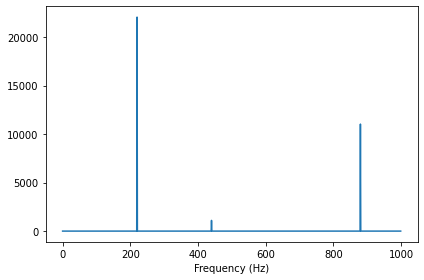

In [74]:
sin_spectrum = sin_wave.make_spectrum()
sin_spectrum.plot(high=1000)
decorate(xlabel='Frequency (Hz)')

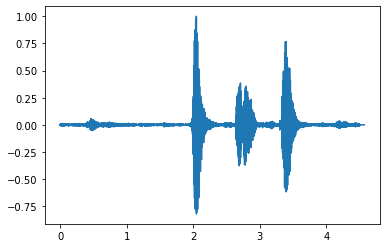

In [75]:
wave = read_wave(filename="speech.wav")
wave.make_audio()
wave.plot()

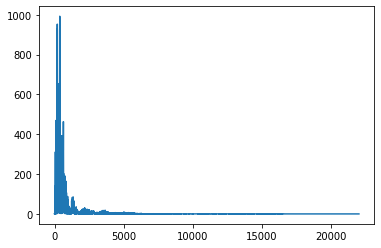

In [76]:
spectrum = wave.make_spectrum()
spectrum.plot()

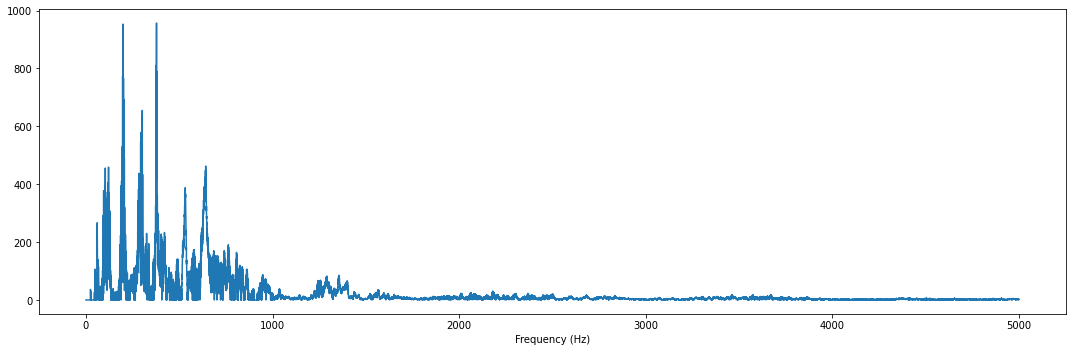

In [108]:
threshold = 0.01
max_amp = max(norm_amps)
amp_gate = max_amp * threshold
target = wave
framerate = target.framerate
ys = target.ys[0:int(4.5 * framerate)]
n = len(ys)

hs = np.fft.rfft(a=ys)
fs = np.fft.rfftfreq(n, 1 / framerate)
amps = np.abs(hs)
norm_amps = amps * (2 / n)

clean_hs = np.copy(hs)
clean_hs[ np.logical_and(fs < 1000, amps < 20) ] = 0
clean_ys = np.fft.irfft(clean_hs)

plt.figure(figsize=(15,5))
clean_wave = Wave(ys=clean_ys, framerate=framerate)
clean_wave.make_spectrum().plot(high=5000)
decorate(xlabel='Frequency (Hz)')

clean_wave.make_audio()
